<a href="https://www.kaggle.com/code/ehetshamshaukat/stroke-analysis-and-prediction?scriptVersionId=103916583" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis to Machine Learning

# Analysis

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly 
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline 

## Data importing

In [2]:
dataset=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
dataset.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4790,1989,Male,37.0,0,0,Yes,Private,Rural,107.06,NaN,smokes,0
2467,7892,Male,78.0,0,0,Yes,Private,Urban,74.70,28.8,formerly smoked,0
4388,54127,Female,40.0,0,0,Yes,Self-employed,Urban,106.76,24.1,formerly smoked,0
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
3281,55400,Female,5.0,0,0,No,children,Rural,73.92,17.2,Unknown,0


## Preprocessing

In [3]:
dataset.shape

(5110, 12)

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataset["bmi"].fillna(dataset["bmi"].mean(),inplace=True)

In [7]:
dataset.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3982,42700,Female,52.0,0,0,Yes,Private,Rural,200.46,25.0,Unknown,0
4421,5647,Female,18.0,0,0,No,Private,Urban,99.01,25.5,formerly smoked,0
4517,68789,Female,28.0,0,0,No,Private,Urban,62.44,37.2,Unknown,0
4998,39229,Female,24.0,0,0,Yes,Private,Rural,67.99,32.1,never smoked,0
3740,5380,Female,26.0,0,0,Yes,Private,Urban,91.35,23.8,never smoked,0


In [8]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
dataset.shape

(5110, 12)

In [10]:
col=["hypertension","heart_disease","stroke"]
for x in col:
    dataset[x].replace([0,1],["No","Yes"],inplace=True)

In [11]:
dataset.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5087,26214,Female,63.0,No,No,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,No
3310,70392,Male,34.0,No,No,Yes,Private,Rural,112.72,19.4,Unknown,No
370,28286,Male,44.0,No,No,Yes,Private,Rural,74.91,37.5,never smoked,No
2649,42412,Female,18.0,No,No,No,Private,Urban,146.59,27.7,Unknown,No
44,7937,Male,60.0,Yes,No,Yes,Govt_job,Urban,213.03,20.2,smokes,Yes


## Reuseable code

In [12]:
# for creating pie chart 
def create_pie(name,title,text):
    values=name.values
    labels=name.index
    trace0=go.Pie(values=values,labels=labels,textposition="inside",textinfo="label+percent+value",hole=0.4)
    data=[trace0]
    layout=dict(title=title,title_x=0.5,annotations=[dict(text=text,x=0.5,y=0.5,showarrow=False,font_size=14)])
    fig=dict(data=data,layout=layout)
    offline.iplot(fig)

In [13]:
def create_sunburst(df,path:list,value,title):
    fig=px.sunburst(df,path=path,values=value)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

## Analyzing

In [14]:
dataset.shape

(5110, 12)

In [15]:
dataset.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.698018
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.800000
50%,36932.000000,45.000000,91.885000,28.400000
75%,54682.000000,61.000000,114.090000,32.800000
max,72940.000000,82.000000,271.740000,97.600000


In [16]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


### 1. By gender

In [18]:
genders=dataset["gender"].unique()
genders

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
counts_of_genders=dataset["gender"].value_counts()
counts_of_genders

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
create_pie(counts_of_genders,"Gender Distribution","Gender")

In [21]:
gender_and_stroke=dataset.groupby(["gender","stroke"]).agg(total_stroke=("stroke","count")).reset_index()
gender_and_stroke

,gender,stroke,total_stroke
0,Female,No,2853
1,Female,Yes,141
2,Male,No,2007
3,Male,Yes,108
4,Other,No,1


In [22]:
create_sunburst(gender_and_stroke,["gender","stroke","total_stroke"],"total_stroke","Gender Vs. Stroke")

### 2. By age 

In [23]:
dataset["age"].max()

82.0

In [24]:
dataset["age"].min()

0.08

In [25]:
dataset["age"].mean()

43.226614481409

In [26]:
dataset[(dataset["age"] >=50) & (dataset["stroke"]== "Yes")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.000000,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,Yes,Yes,Yes,Private,Urban,247.51,40.500000,formerly smoked,Yes
244,17739,Male,57.0,No,No,Yes,Private,Rural,84.96,36.700000,Unknown,Yes
246,27153,Female,75.0,No,No,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,Yes
247,34060,Male,71.0,Yes,No,Yes,Self-employed,Rural,87.80,28.893237,Unknown,Yes


### 3. By hypertension

In [27]:
dataset["hypertension"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
hypertension=dataset["hypertension"].value_counts()
hypertension

No     4612
Yes     498
Name: hypertension, dtype: int64

In [29]:
create_pie(hypertension,"HyperTension Distribution","Hypertension")

In [30]:
gender_vs_hypertension=dataset.groupby(["gender","hypertension"]).agg(stroke_due_to_hypertension=("stroke","count")).reset_index()
gender_vs_hypertension

,gender,hypertension,stroke_due_to_hypertension
0,Female,No,2718
1,Female,Yes,276
2,Male,No,1893
3,Male,Yes,222
4,Other,No,1


In [31]:
create_sunburst(gender_vs_hypertension,["gender","hypertension","stroke_due_to_hypertension"],"stroke_due_to_hypertension","Gender and stroke due to hypertension")

### 4. By martial status

In [32]:
married_category=dataset["ever_married"].unique()
married_category

array(['Yes', 'No'], dtype=object)

In [33]:
married_category_count=dataset["ever_married"].value_counts()
married_category_count

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [34]:
create_pie(married_category_count,"Married Distribution","Married")

In [35]:
gender_married_stroke=dataset.groupby(["gender","ever_married","stroke"]).agg(married_or_not=("ever_married","count"),stroke_count=("stroke","count")).reset_index()
gender_married_stroke

,gender,ever_married,stroke,married_or_not,stroke_count
0,Female,No,No,972,972
1,Female,No,Yes,21,21
2,Female,Yes,No,1881,1881
3,Female,Yes,Yes,120,120
4,Male,No,No,755,755
5,Male,No,Yes,8,8
6,Male,Yes,No,1252,1252
7,Male,Yes,Yes,100,100
8,Other,No,No,1,1


In [36]:
create_sunburst(gender_married_stroke,["gender","ever_married","stroke"],"stroke_count","Gender, Married and Frequency")

[]

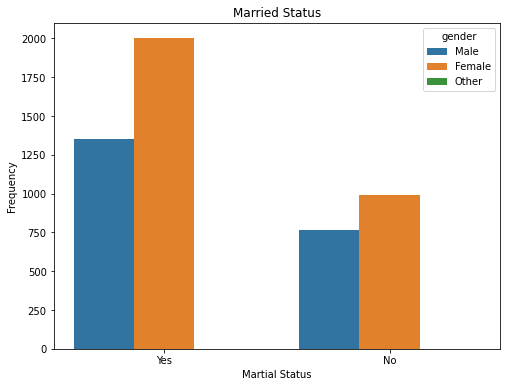

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset,x="ever_married",hue="gender")
plt.title("Married Status")
plt.xlabel("Martial Status")
plt.ylabel("Frequency")
plt.plot()

In [38]:
dataset[(dataset["ever_married"] == "Yes") & (dataset["stroke"]== 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### 5. By work type

In [39]:
dataset["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [40]:
work_type=dataset["work_type"].value_counts()
work_type

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [41]:
create_pie(work_type,"Work type","Work")

In [42]:
worktype_and_stroke=dataset.groupby(["work_type","stroke"]).agg(stroke_count=("stroke","count")).reset_index()
worktype_and_stroke

,work_type,stroke,stroke_count
0,Govt_job,No,624
1,Govt_job,Yes,33
2,Never_worked,No,22
3,Private,No,2776
4,Private,Yes,149
5,Self-employed,No,754
6,Self-employed,Yes,65
7,children,No,685
8,children,Yes,2


In [43]:
create_sunburst(worktype_and_stroke,["work_type","stroke","stroke_count"],"stroke_count","Work type and stroke")

[]

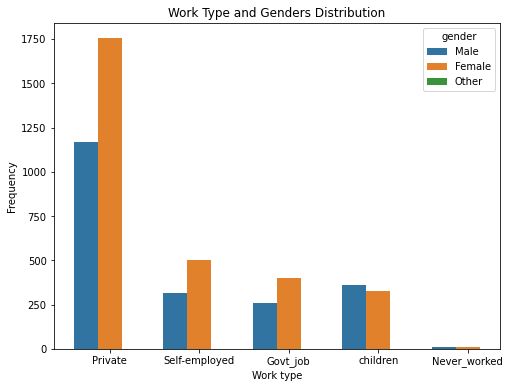

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset,x="work_type",hue="gender")
plt.title("Work Type and Genders Distribution")
plt.xlabel("Work type")
plt.ylabel("Frequency")
plt.plot()

### 6. By residency

In [45]:
residence_type=dataset["Residence_type"].unique()

In [46]:
residence_count=dataset["Residence_type"].value_counts()
residence_count

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [47]:
create_pie(residence_count,"Residence Distribution","Residence")

In [48]:
# plt.figure(figsize=(8,6))
# sns.barplot(data=dataset,x="Residence_type",y="stroke",ci=None)
# plt.title("Stoke vs Residence")
# plt.xlabel("Residence Type")
# plt.ylabel("Stroke Count")
# plt.legend(["Urban","Rural"])
# plt.plot()

In [49]:
residence_and_stroke=dataset.groupby(["Residence_type","stroke"]).agg(residence_type_count=("Residence_type","count")).reset_index()
residence_and_stroke

,Residence_type,stroke,residence_type_count
0,Rural,No,2400
1,Rural,Yes,114
2,Urban,No,2461
3,Urban,Yes,135


In [50]:
create_sunburst(residence_and_stroke,["Residence_type","stroke","residence_type_count"],"residence_type_count","Residence type and Stroke")

### 7. By smoking_status

In [51]:
dataset["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [52]:
smoke_status=dataset["smoking_status"].value_counts()
smoke_status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [53]:
create_pie(smoke_status,"Smoke Distribution","Smoke addiction")

In [54]:
dataset[(dataset["smoking_status"]=="smokes") & (dataset["stroke"]==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### 8. By stroke

In [55]:
dataset["stroke"].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
stroke=dataset["stroke"].value_counts()
stroke

No     4861
Yes     249
Name: stroke, dtype: int64

In [57]:
create_pie(stroke,"Stroke distribution","Stroke")

[]

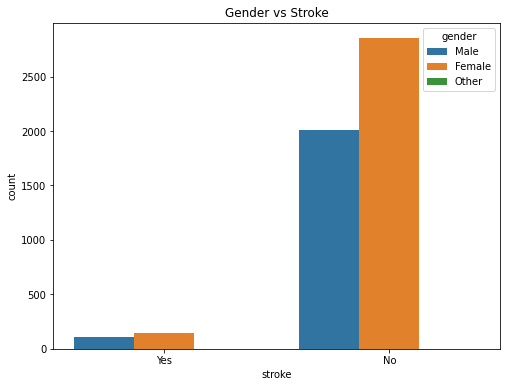

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset,x="stroke",hue="gender")
plt.title("Gender vs Stroke")
plt.plot()

# Machine Learning

* ## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix

* ## Reading data

In [60]:
dataset_for_ml=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
dataset_for_ml

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


* ## Preprocessing

In [61]:
dataset_for_ml.shape

(5110, 12)

In [62]:
dataset_for_ml.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1666,44010,Female,3.0,0,0,No,children,Urban,57.33,16.8,Unknown,0
2047,8031,Female,63.0,0,0,Yes,Self-employed,Rural,85.51,26.6,smokes,0
2962,58061,Female,70.0,1,0,Yes,Self-employed,Rural,154.60,28.5,formerly smoked,0
2270,62951,Female,32.0,0,0,Yes,Private,Rural,61.83,31.3,never smoked,0
4142,66306,Female,43.0,0,0,Yes,Private,Rural,82.57,29.1,never smoked,0


In [63]:
dataset_for_ml.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
dataset_for_ml["bmi"].fillna(dataset["bmi"].mean(),inplace=True)

In [65]:
dataset_for_ml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [66]:
dataset_for_ml.shape

(5110, 12)

In [67]:
dataset_for_ml.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
dataset_for_ml.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [69]:
dataset_for_ml.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3754,18943,Male,26.0,0,0,No,Govt_job,Rural,76.74,29.8,Unknown,0


In [70]:
le=LabelEncoder()
dataset_for_ml["gender"]=le.fit_transform(dataset_for_ml["gender"]) # 1 for male and 0 for female
dataset_for_ml["Residence_type"]=le.fit_transform(dataset_for_ml["Residence_type"]) # 1 for urban and 0 for Rural
dataset_for_ml["ever_married"]=le.fit_transform(dataset_for_ml["ever_married"])
dataset_for_ml["work_type"]=le.fit_transform(dataset_for_ml["work_type"])
dataset_for_ml["smoking_status"]=le.fit_transform(dataset_for_ml["smoking_status"])

In [71]:
dataset_for_ml.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

* ## Splitting data 

In [72]:
X=dataset_for_ml.drop("stroke",axis=1)
Y=dataset_for_ml["stroke"]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print("Row and column of x_train are: ",x_train.shape)
print("Row and column of y_train are: ",y_train.shape)
print("Row and column of x_test are: ",x_test.shape)
print("Row and column of y_test are: ",y_test.shape)

Row and column of x_train are:  (4088, 11)
Row and column of y_train are:  (4088,)
Row and column of x_test are:  (1022, 11)
Row and column of y_test are:  (1022,)


* ## Training model

#### 1.Model training using LogisticsRegression

In [74]:
lr=LogisticRegression(penalty='l2',C=1.0,solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

#### 2.Model training using Linear Discriminant Analysis

In [75]:
lda=LinearDiscriminantAnalysis(solver="svd")
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

#### 3.Model training using Quadratic Discriminant Analysis

In [76]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

QuadraticDiscriminantAnalysis()

#### 4.Model training using Support Vector Machine

In [77]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

* ## Prediction

#### 1.Predicting using Logistic Regression

In [78]:
predicted_value_lr=lr.predict(x_test)
predicted_value_lr

array([0, 0, 0, ..., 0, 0, 0])

#### 2.Predicting using Linear Discriminant Analysis

In [79]:
predicted_value_lda=lda.predict(x_test)
predicted_value_lda

array([0, 0, 0, ..., 0, 0, 0])

#### 3.Predicting using Quadratic Discriminant Analysis

In [80]:
predicted_value_qda=qda.predict(x_test)
predicted_value_qda

array([0, 0, 0, ..., 0, 0, 0])

#### 4.Predicting using Support Vector Machine

In [81]:
predicted_value_svm=svc.predict(x_test)
predicted_value_svm

array([0, 0, 0, ..., 0, 0, 0])

* ## Comparing Models

In [82]:
comparation=pd.DataFrame({"Actual Stroke Value":y_test,"Stroke Prediction Using LR":predicted_value_lr,"Stroke Prediction Using LDA":predicted_value_lda,"Stroke Prediction Using QDA":predicted_value_qda,"Stroke Prediction Using SVM":predicted_value_svm})
comparation.sample(5)

,Actual Stroke Value,Stroke Prediction Using LR,Stroke Prediction Using LDA,Stroke Prediction Using QDA,Stroke Prediction Using SVM
4943,0,0,0,0,0
1046,0,0,0,0,0
2287,0,0,0,1,0
2400,0,0,0,0,0
4265,0,0,0,0,0


* ## Model Evaluation

#### 1.Accuracy score

In [83]:
accuracy_score_lr=accuracy_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LR"])
accuracy_score_lda=accuracy_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LDA"])
accuracy_score_qda=accuracy_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using QDA"])
accuracy_score_svm=accuracy_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using SVM"])
print("accuracy score of Logistic Regression is: ",accuracy_score_lr)
print("accuracy score of Linear Discriminant Analysis is: ",accuracy_score_lda)
print("accuracy score of Qudratic Discriminant Analysis is: ",accuracy_score_qda)
print("accuracy score of Support Vector Machine is: ",accuracy_score_svm)

accuracy score of Logistic Regression is:  0.9510763209393346
accuracy score of Linear Discriminant Analysis is:  0.9412915851272016
accuracy score of Qudratic Discriminant Analysis is:  0.8688845401174168
accuracy score of Support Vector Machine is:  0.952054794520548


#### 2.Precision score

In [84]:
precision_score_lr=precision_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LR"])
precision_score_lda=precision_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LDA"])
precision_score_qda=precision_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using QDA"])
precision_score_svm=precision_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using SVM"])
print("precision score of Logistic Regression is: ",precision_score_lr)
print("precision score of Linear Discriminant Analysis is: ",precision_score_lda)
print("precision score of Qudratic Discriminant Analysis is: ",precision_score_qda)
print("precision score of Support Vector Machine is: ",precision_score_svm)


precision score of Logistic Regression is:  0.0
precision score of Linear Discriminant Analysis is:  0.21052631578947367
precision score of Qudratic Discriminant Analysis is:  0.13043478260869565
precision score of Support Vector Machine is:  0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



#### 3.Recall score

In [85]:
recall_score_lr=recall_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LR"])
recall_score_lda=recall_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LDA"])
recall_score_qda=recall_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using QDA"])
recall_score_svm=recall_score(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using SVM"])
print("Recall score of Logistic Regression is: ",recall_score_lr)
print("Recall score of Linear Discriminant Analysis is: ",recall_score_lda)
print("Recall score of Qudratic Discriminant Analysis is: ",recall_score_qda)
print("Recall score of Support Vector Machine is: ",recall_score_svm)

Recall score of Logistic Regression is:  0.0
Recall score of Linear Discriminant Analysis is:  0.08163265306122448
Recall score of Qudratic Discriminant Analysis is:  0.30612244897959184
Recall score of Support Vector Machine is:  0.0


#### 4.Confusion matrix

In [86]:
confusion_matrix_lr=confusion_matrix(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LR"])
confusion_matrix_lr

array([[972,   1],
       [ 49,   0]])

In [87]:
confusion_matrix_lda=confusion_matrix(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using LDA"])
confusion_matrix_lda

array([[958,  15],
       [ 45,   4]])

In [88]:
confusion_matrix_qda=confusion_matrix(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using QDA"])
confusion_matrix_qda

array([[873, 100],
       [ 34,  15]])

In [89]:
confusion_matrix_svm=confusion_matrix(comparation["Actual Stroke Value"],comparation["Stroke Prediction Using SVM"])
confusion_matrix_svm

array([[973,   0],
       [ 49,   0]])